In [5]:
import numpy as np
import scipy.optimize as sop

The Newton method uses the f'(x) component to infer the trend of the function in the vicinity of x. Can be derived from the Taylor series expansion where f(xi+1) = 0
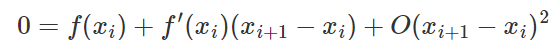

assuming xi+1 is close to xi, we can drop higher order terms to find 
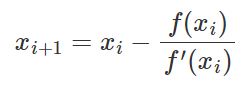

In [6]:
def newton(f, x0, dfdx, atol=1.0e-6):
    x = [x0] # create a list to append successive guesses of x, beginning with our initial guess
    fevals = 0 # number of iterations
    
    while True:
        x.append(x[-1] - f(x[-1])/dfdx(x[-1])) #add a new entry to x, plugging it into the Newton-Raphson formula
        fevals += 2
        if abs(x[-1]-x[-2]) < atol:
            print("Newton (analytical derivative) used",
                 fevals, "function evaluations")
            return x[-1]

In [7]:
def f(x):
    return 2*x + x*np.sin(x-3) - 5

def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)

In [9]:
x0 = 0
print("Our solution = ", newton(f, x0, dfdx))
print("SciPy solution = ", sop.newton(f, x0, dfdx))

Newton (analytical derivative) used 10 function evaluations
Our solution =  2.7903546180673837
SciPy solution =  2.7903546180673837


For expressions where f'(x) is not easily calculable, it is possible to use the different approximation i.e. diff from first principles:

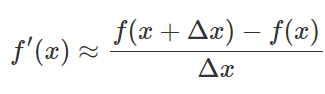

In [6]:
def quasi_newton(f, x0, dx=1.0E-7, atol=1.0E-6):
    x= [x0]
    while True:
        dfdx = (f(x[-1] + dx) - f(x[-1]))/(dx)
        x.append(x[-1] - f(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

In [7]:
def f(x):
    return 2*x + x*np.sin(x-3)-5

In [8]:
x0 = 0
print("Our solution = ", quasi_newton(f, x0))
print("SciPy solution = ", sop.newton(f, x0))

Our solution =  2.7903546180673837
SciPy solution =  2.7903546180673837
